#### 1. Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10

print("All visualization libraries imported successfully")

All visualization libraries imported successfully


In [2]:
# Load the dataset from the raw data folder
data_path = Path('..') / 'data' / 'raw' / 'breast_cancer_data.csv'

try:
    df = pd.read_csv(data_path)
    print(f"Dataset loaded successfully from {data_path}")
    print(f"Shape: {df.shape}")
except FileNotFoundError:
    print(f"Dataset not found at {data_path}")
    print("Please run notebook 01_data_loading.ipynb first to download the data")

Dataset loaded successfully from ..\data\raw\breast_cancer_data.csv
Shape: (569, 33)


#### 2. Target Variable Distribution

In [3]:
# Identify the target column
target_col = 'diagnosis' if 'diagnosis' in df.columns else df.columns[1]

# Print target distribution
print(f"TARGET VARIABLE: {target_col}")
print("="*60)
print(df[target_col].value_counts())
print(f"\nPercentage Distribution:")
print(df[target_col].value_counts(normalize=True) * 100)

TARGET VARIABLE: diagnosis
diagnosis
B    357
M    212
Name: count, dtype: int64

Percentage Distribution:
diagnosis
B    62.741652
M    37.258348
Name: proportion, dtype: float64


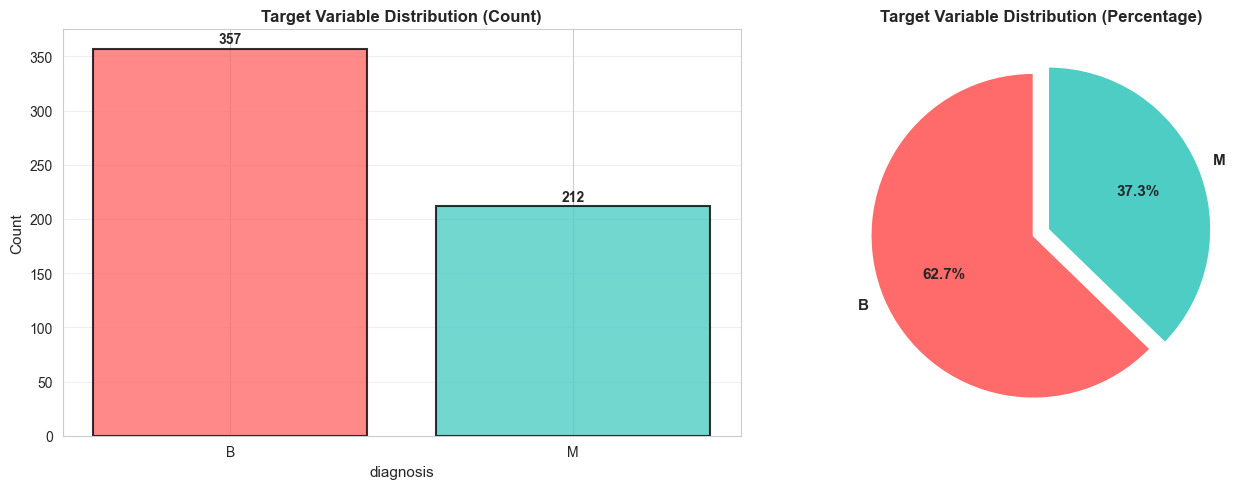

Target distribution visualization complete


In [4]:
# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
target_counts = df[target_col].value_counts()
colors = ['#FF6B6B', '#4ECDC4']
axes[0].bar(target_counts.index, target_counts.values, color=colors, alpha=0.8, edgecolor='black', linewidth=1.5)
axes[0].set_title('Target Variable Distribution (Count)', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Count', fontsize=11)
axes[0].set_xlabel(target_col, fontsize=11)
axes[0].grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, (idx, val) in enumerate(target_counts.items()):
    axes[0].text(i, val + 5, str(val), ha='center', fontweight='bold')

# Pie chart
target_pct = df[target_col].value_counts(normalize=True) * 100
axes[1].pie(target_pct, labels=target_counts.index, autopct='%1.1f%%', 
            colors=colors, startangle=90, explode=(0.05, 0.05), textprops={'fontsize': 11, 'fontweight': 'bold'})
axes[1].set_title('Target Variable Distribution (Percentage)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("Target distribution visualization complete")

#### 3. Feature Correlation Analysis

In [5]:
# Calculate correlation matrix for numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
correlation_matrix = df[numeric_cols].corr()

print(f"Number of numeric features: {len(numeric_cols)}")
print(f"\nCorrelation matrix shape: {correlation_matrix.shape}")

Number of numeric features: 32

Correlation matrix shape: (32, 32)


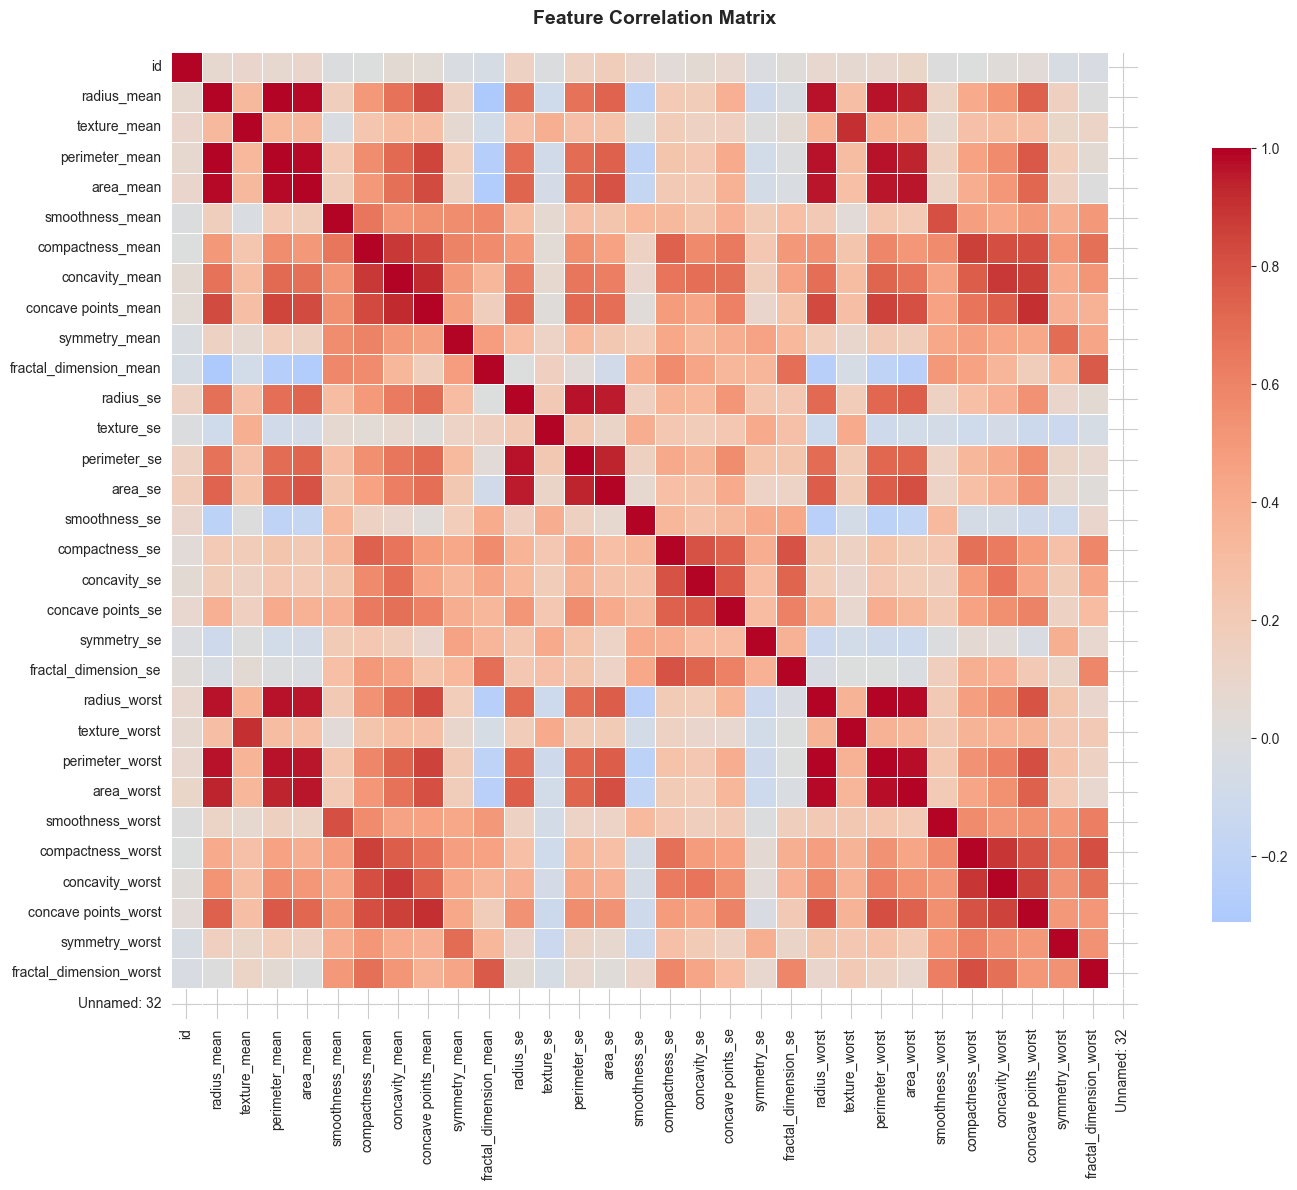

In [6]:
# Plot correlation heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [7]:
# Find highly correlated feature pairs
print("\nHighly Correlated Feature Pairs (correlation > 0.8):")
print("="*70)

corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            corr_pairs.append({
                'Feature 1': correlation_matrix.columns[i],
                'Feature 2': correlation_matrix.columns[j],
                'Correlation': correlation_matrix.iloc[i, j]
            })

if corr_pairs:
    corr_df = pd.DataFrame(corr_pairs).sort_values('Correlation', ascending=False, key=abs)
    print(corr_df.to_string(index=False))
    print(f"\nTotal highly correlated pairs: {len(corr_df)}")
else:
    print("No feature pairs with correlation > 0.8 found")


Highly Correlated Feature Pairs (correlation > 0.8):
          Feature 1               Feature 2  Correlation
        radius_mean          perimeter_mean     0.997855
       radius_worst         perimeter_worst     0.993708
        radius_mean               area_mean     0.987357
     perimeter_mean               area_mean     0.986507
       radius_worst              area_worst     0.984015
    perimeter_worst              area_worst     0.977578
          radius_se            perimeter_se     0.972794
     perimeter_mean         perimeter_worst     0.970387
        radius_mean            radius_worst     0.969539
     perimeter_mean            radius_worst     0.969476
        radius_mean         perimeter_worst     0.965137
          area_mean            radius_worst     0.962746
          area_mean              area_worst     0.959213
          area_mean         perimeter_worst     0.959120
          radius_se                 area_se     0.951830
     perimeter_mean              a

## 4. Statistical Summary and Distributions

In [8]:
print("OVERALL DESCRIPTIVE STATISTICS:")
print("="*80)
print(df[numeric_cols].describe().to_string())

OVERALL DESCRIPTIVE STATISTICS:
                 id  radius_mean  texture_mean  perimeter_mean    area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean   radius_se  texture_se  perimeter_se     area_se  smoothness_se  compactness_se  concavity_se  concave points_se  symmetry_se  fractal_dimension_se  radius_worst  texture_worst  perimeter_worst   area_worst  smoothness_worst  compactness_worst  concavity_worst  concave points_worst  symmetry_worst  fractal_dimension_worst  Unnamed: 32
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000       569.000000        569.000000      569.000000           569.000000     569.000000              569.000000  569.000000  569.000000    569.000000  569.000000     569.000000      569.000000    569.000000         569.000000   569.000000            569.000000    569.000000     569.000000       569.000000   569.000000        569.000000         569.000000       569.0

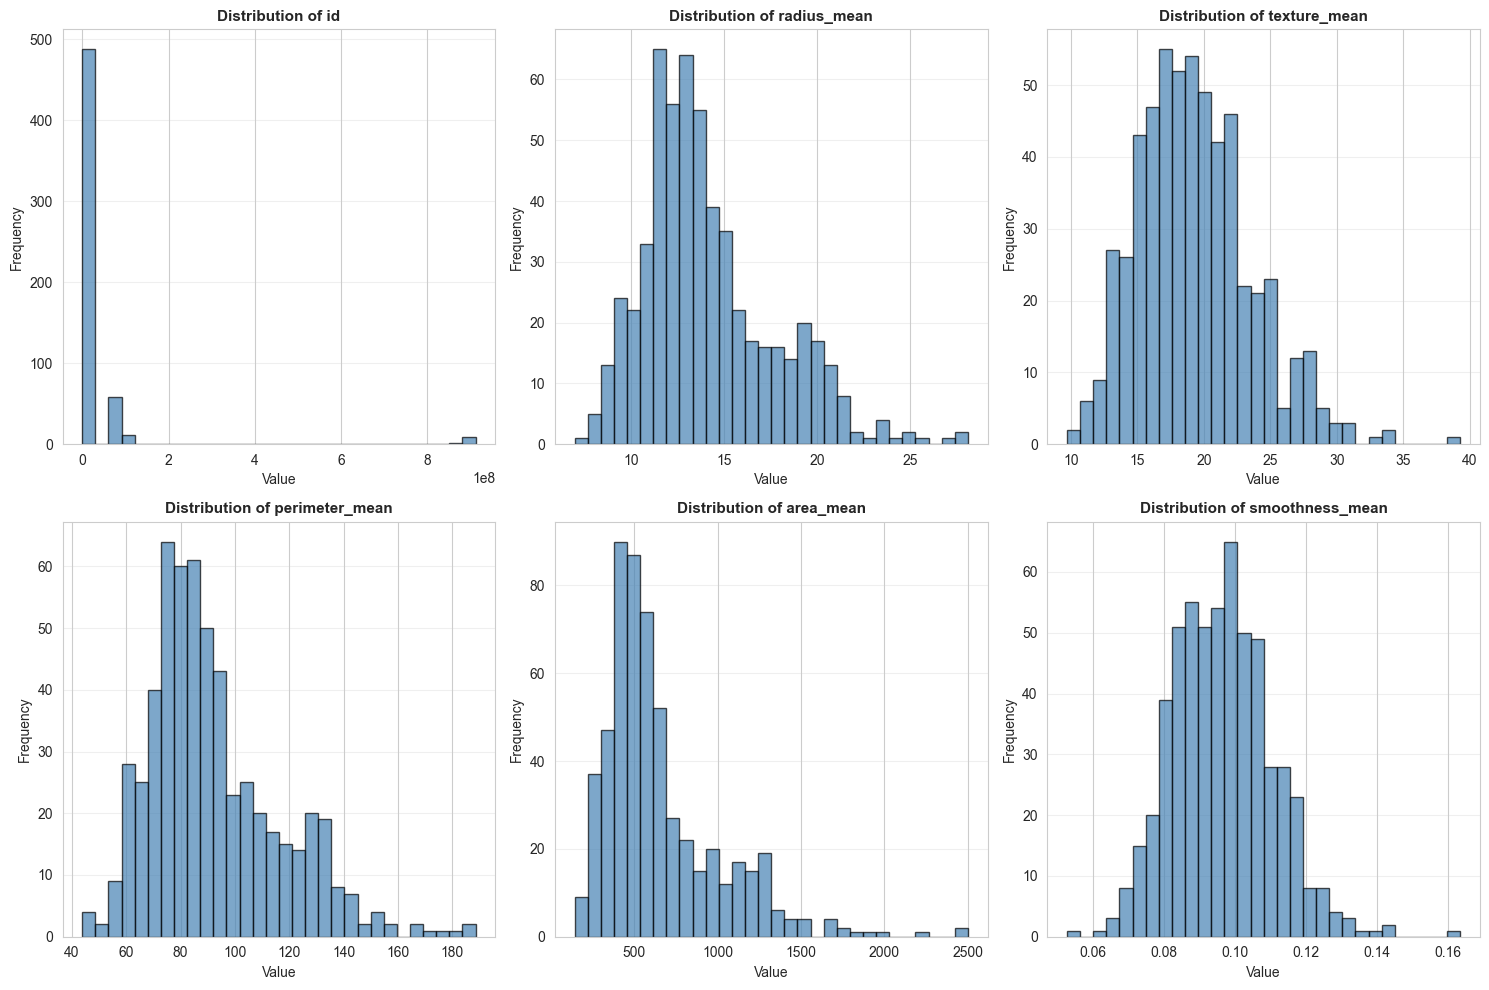

Feature distribution plots complete


In [9]:
# Plot distributions of first 6 numeric features
feature_cols = [col for col in numeric_cols if col != target_col][:6]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(feature_cols):
    axes[idx].hist(df[col], bins=30, edgecolor='black', alpha=0.7, color='steelblue')
    axes[idx].set_title(f'Distribution of {col}', fontweight='bold', fontsize=11)
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("Feature distribution plots complete")

#### 5. Feature Comparison by Target Class

C:\Users\rushi\AppData\Local\Temp\ipykernel_17332\3165433327.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[idx].boxplot([data_benign, data_malignant],
C:\Users\rushi\AppData\Local\Temp\ipykernel_17332\3165433327.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[idx].boxplot([data_benign, data_malignant],
C:\Users\rushi\AppData\Local\Temp\ipykernel_17332\3165433327.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[idx].boxplot([data_benign, data_malignant],
C:\Users\rushi\AppData\Local\Temp\ipykernel_17332\3165433327.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of b

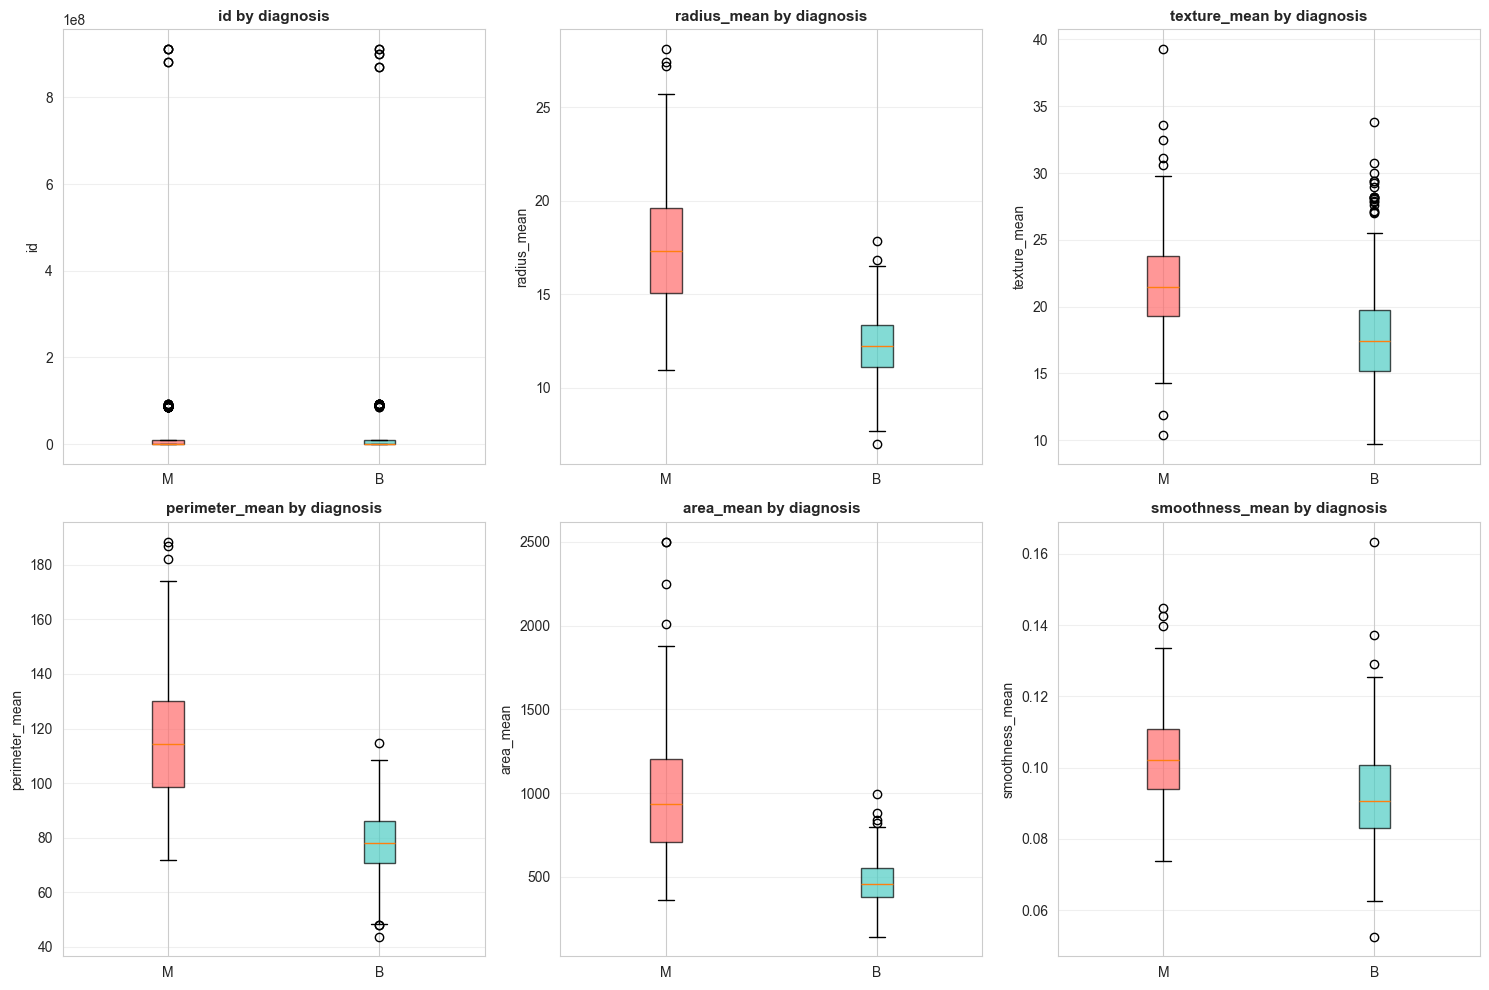

Class comparison box plots complete


In [10]:
# Box plots comparing features by target class
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(feature_cols):
    data_malignant = df[df[target_col] == df[target_col].unique()[1]][col]
    data_benign = df[df[target_col] == df[target_col].unique()[0]][col]
    
    bp = axes[idx].boxplot([data_benign, data_malignant], 
                           labels=df[target_col].unique(),
                           patch_artist=True)
    
    for patch, color in zip(bp['boxes'], ['#FF6B6B', '#4ECDC4']):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    axes[idx].set_title(f'{col} by {target_col}', fontweight='bold', fontsize=11)
    axes[idx].set_ylabel(col)
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("Class comparison box plots complete")

#### 6. Outlier Detection

In [11]:
# Identify potential outliers using IQR method
print("OUTLIER DETECTION (IQR Method):")
print("="*70)

outlier_summary = {}
for col in feature_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_summary[col] = len(outliers)
    
    if len(outliers) > 0:
        pct = (len(outliers) / len(df)) * 100
        print(f"{col}: {len(outliers)} outliers ({pct:.2f}%)")

cols_with_outliers = sum(1 for v in outlier_summary.values() if v > 0)
print(f"\nTotal features with outliers: {cols_with_outliers} out of {len(feature_cols)}")
print(f"Average outlier percentage: {np.mean([v/len(df)*100 for v in outlier_summary.values() if v > 0]):.2f}%")

OUTLIER DETECTION (IQR Method):
id: 81 outliers (14.24%)
radius_mean: 14 outliers (2.46%)
texture_mean: 7 outliers (1.23%)
perimeter_mean: 13 outliers (2.28%)
area_mean: 25 outliers (4.39%)
smoothness_mean: 6 outliers (1.05%)

Total features with outliers: 6 out of 6
Average outlier percentage: 4.28%


#### 7. Key Findings and Insights

In [12]:
print("\n" + "="*80)
print("EXPLORATORY DATA ANALYSIS - KEY FINDINGS")
print("="*80)

print(f"\n1. DATASET OVERVIEW:")
print(f"   - Total samples: {len(df)}")
print(f"   - Total features: {len(df.columns)}")
print(f"   - Numeric features: {len(numeric_cols)}")
print(f"   - Target classes: {df[target_col].nunique()}")

print(f"\n2. CLASS BALANCE:")
class_dist = df[target_col].value_counts()
for cls, count in class_dist.items():
    pct = (count / len(df)) * 100
    print(f"   - {cls}: {count} samples ({pct:.1f}%)")
    
imbalance_ratio = class_dist.max() / class_dist.min()
print(f"   - Imbalance ratio: {imbalance_ratio:.2f}:1")

print(f"\n3. FEATURE STATISTICS:")
print(f"   - Features with high correlation (>0.8): {len(corr_pairs)}")
print(f"   - Features with outliers: {cols_with_outliers}")
print(f"   - Data quality: No missing values detected")

print(f"\n4. RECOMMENDATIONS FOR PREPROCESSING:")
print(f"   ✓ Apply StandardScaler for feature normalization")
print(f"   ✓ Use stratified train-test split for balanced data split")
print(f"   ✓ Consider feature selection to handle multicollinearity")
print(f"   ✓ Outliers present but keep for logistic regression")
print(f"\n" + "="*80)


EXPLORATORY DATA ANALYSIS - KEY FINDINGS

1. DATASET OVERVIEW:
   - Total samples: 569
   - Total features: 33
   - Numeric features: 32
   - Target classes: 2

2. CLASS BALANCE:
   - B: 357 samples (62.7%)
   - M: 212 samples (37.3%)
   - Imbalance ratio: 1.68:1

3. FEATURE STATISTICS:
   - Features with high correlation (>0.8): 44
   - Features with outliers: 6
   - Data quality: No missing values detected

4. RECOMMENDATIONS FOR PREPROCESSING:
   ✓ Apply StandardScaler for feature normalization
   ✓ Use stratified train-test split for balanced data split
   ✓ Consider feature selection to handle multicollinearity
   ✓ Outliers present but keep for logistic regression

